In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# create 3 folders in the same directory where canny_edge_detector code is: tmp, tmp2, tmp3

# directories
# --canny_edge_detector
# --transferredFrames
# --tmp
# --tmp2
# --tmp3

In [10]:
# cd to canny edge directory
%cd /content/drive/My\ Drive/Colab\ Notebooks/canny_edge_detector

/content/drive/My Drive/Colab Notebooks/canny_edge_detector


../transferredFrames
Loaded images in 133s
frame17.jpg
frame16.jpg
frame23.jpg
frame24.jpg
frame19.jpg
frame12.jpg
frame4.jpg
frame15.jpg
frame13.jpg
frame10.jpg
frame8.jpg
frame14.jpg
frame11.jpg
frame1.jpg
frame9.jpg
etcProcessed images in 129s


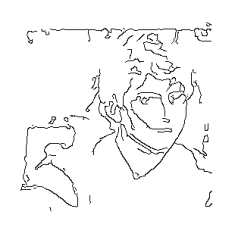

In [11]:
# run and save edge detection result
# output will be in tmp

%matplotlib inline
from utils import utils
import canny_edge_detector as ced
import time

start_time = time.time()
imgs = utils.load_data() # is a dictionary
end_time = time.time()
print('Loaded images in %ds' % (end_time - start_time))
# utils.visualize(imgs, 'gray')

detector = ced.cannyEdgeDetector(imgs, sigma=0.8, kernel_size=5, lowthreshold=0.1, highthreshold=0.3, weak_pixel=100)


# in detect, I set it to break out of the loop once it processed 10 images
imgs_final = detector.detect() #dictionary 

utils.visualize(imgs_final, 'gray_r')

In [12]:
# this directory contains result for edge detection

%cd /content/drive/My\ Drive/Colab\ Notebooks/tmp
# %cd /content/

/content/drive/My Drive/Colab Notebooks/tmp


In [13]:
# function for turning outline background transparent
# output will be in tmp2

import cv2
def transparent(file_name):
  # file_name = "outline-frame458.jpg"
  src = cv2.imread(file_name, 1)
  tmp = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
  # _,alpha = cv2.threshold(tmp,0,255,cv2.THRESH_BINARY)
  _,alpha = cv2.threshold(tmp, 240, 255, cv2.THRESH_BINARY_INV)
  b, g, r = cv2.split(src)
  rgba = [b,g,r, alpha]
  dst = cv2.merge(rgba,4)
  file_name = file_name[:-3] + 'png' if file_name.endswith('jpg') else file_name
  cv2.imwrite('../tmp2/' + file_name, dst)

In [14]:
# function for layering and saving
# output will be in tmp3

from PIL import Image  
def layer(outline, filename): #.png , ori

  # ensure they are RGB (not palette)
  bg = Image.open('../transferredFrames/' + filename).convert('RGB')
  fg = Image.open('../tmp2/' + outline).convert('RGBA') #result-trans.png

  # Resize foreground 
  fg_resized = fg.resize((256,256))

  # Overlay foreground onto background at top right corner
  bg.paste(fg_resized,box=(0,0),mask=fg_resized)

  bg.save('../tmp3/' + outline)

In [16]:
from pathlib import Path

pathlist = Path('').rglob('*.jpg')
global currentPath
for path in pathlist:
  filename = str(path)
  ori_frame = '../transferredFrames/' + filename
  transparent(filename) #is png
  file_name = filename[:-3] + 'png' if filename.endswith('jpg') else filename
  print(file_name, filename)
  layer(file_name, filename)

frame589.png frame589.jpg
etc

In [ ]:
# for testing during development

In [ ]:
import cv2

# %cd /content/

file_name = "frame458.jpg"
# file_name = "outline-3 (1).png" 

transparent(file_name)

# src = cv2.imread(file_name, 1)
# tmp = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
# # _,alpha = cv2.threshold(tmp,0,255,cv2.THRESH_BINARY)
# _,alpha = cv2.threshold(tmp, 240, 255, cv2.THRESH_BINARY_INV)
# b, g, r = cv2.split(src)
# rgba = [b,g,r, alpha]
# dst = cv2.merge(rgba,4)
# cv2.imwrite("../tmp4/test.png", dst)

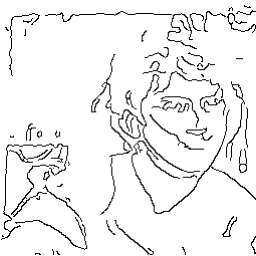

In [ ]:
from IPython.display import Image

# Image('../tmp4/test.png')
Image('../tmp2/frame458.png')

In [ ]:
from PIL import Image

file_name = "frame458.png"
layer(file_name, 'frame458.jpg')

# # ensure they are RGB (not palette)
# bg = Image.open('../transferredFrames/frame458.jpg').convert('RGB')
# fg = Image.open('../tmp4/test.png').convert('RGBA') #result-trans.png

# # Resize foreground 
# fg_resized = fg.resize((256,256))

# # Overlay foreground onto background at top right corner
# bg.paste(fg_resized,box=(0,0),mask=fg_resized)

# bg.save('../tmp4/result-blend.png')

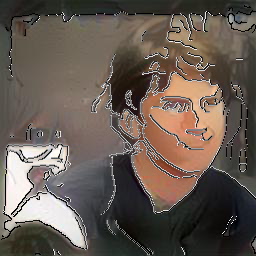

In [ ]:
from IPython.display import Image

Image('../tmp3/frame458.png')
# Image('../tmp4/result-blend.png')